In [77]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# Thiết lập đường dẫn để import các hàm vẽ
import sys
repo_root = os.getcwd()
if os.path.basename(repo_root) == 'notebooks':
    repo_root = os.path.dirname(repo_root)
if repo_root not in sys.path:
    sys.path.append(repo_root)

from src.visualization import (
    bar_chart,
    countplot_from_array,
    plot_hist,
    plot_box,
    hist_and_box,
    heatmap_corr,
)

In [ ]:
cwd = os.getcwd()
path_data = os.path.join(cwd, 'data/raw', 'raw.csv')
if not os.path.exists(path_data):
    path_data = os.path.join(os.path.dirname(cwd), 'data', 'raw.csv')

if not os.path.exists(path_data):
    raise FileNotFoundError(f'Không tìm thấy raw.csv ở {path_data}')

data = np.genfromtxt(
    path_data,
    delimiter=',',
    dtype=None,
    names=True,
    encoding='utf-8'
)
print(f"Số dòng: {data.shape[0]}")
print(f'Số cột: {len(data.dtype.names)}')
print("5 dòng dữ liệu đầu tiên:")
print(data[:5])

Số dòng: 10127
Số cột: 23
5 dòng dữ liệu đầu tiên:
[(768805383, '"Existing Customer"', 45, '"M"', 3, '"High School"', '"Married"', '"$60K - $80K"', '"Blue"', 39, 5, 1, 3, 12691.,  777, 11914., 1.335, 1144, 42, 1.625, 0.061, 9.3448e-05, 0.99991)
 (818770008, '"Existing Customer"', 49, '"F"', 5, '"Graduate"', '"Single"', '"Less than $40K"', '"Blue"', 44, 6, 1, 2,  8256.,  864,  7392., 1.541, 1291, 33, 3.714, 0.105, 5.6861e-05, 0.99994)
 (713982108, '"Existing Customer"', 51, '"M"', 3, '"Graduate"', '"Married"', '"$80K - $120K"', '"Blue"', 36, 4, 1, 0,  3418.,    0,  3418., 2.594, 1887, 20, 2.333, 0.   , 2.1081e-05, 0.99998)
 (769911858, '"Existing Customer"', 40, '"F"', 4, '"High School"', '"Unknown"', '"Less than $40K"', '"Blue"', 34, 3, 4, 1,  3313., 2517,   796., 1.405, 1171, 20, 2.333, 0.76 , 1.3366e-04, 0.99987)
 (709106358, '"Existing Customer"', 40, '"M"', 3, '"Uneducated"', '"Married"', '"$60K - $80K"', '"Blue"', 21, 5, 1, 0,  4716.,    0,  4716., 2.175,  816, 28, 2.5  , 0.   , 2

In [80]:
column_names = data.dtype.names
print(f"Tên các cột: {column_names}")

Tên các cột: ('CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2')


In [81]:
# Kiểu dữ liệu
for name in column_names:
    print(f"{name}: {data[name].dtype}")

CLIENTNUM: int64
Attrition_Flag: <U19
Customer_Age: int64
Gender: <U3
Dependent_count: int64
Education_Level: <U15
Marital_Status: <U10
Income_Category: <U16
Card_Category: <U10
Months_on_book: int64
Total_Relationship_Count: int64
Months_Inactive_12_mon: int64
Contacts_Count_12_mon: int64
Credit_Limit: float64
Total_Revolving_Bal: int64
Avg_Open_To_Buy: float64
Total_Amt_Chng_Q4_Q1: float64
Total_Trans_Amt: int64
Total_Trans_Ct: int64
Total_Ct_Chng_Q4_Q1: float64
Avg_Utilization_Ratio: float64
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1: float64
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2: float64


## Mô tả dữ liệu
| Tên biến                       | Kiểu dữ liệu             | Ý nghĩa                                                             | Phạm vi / Giá trị                                                                           |
| ------------------------------ | ------------------------ | ------------------------------------------------------------------- | ------------------------------------------------------------------------------------------- |
| **CLIENTNUM**                  | Numerical (ID)           | Mã số định danh khách hàng                                          | Số nguyên (unique)                                                                          |
| **Attrition_Flag**             | Categorical (binary)     | Trạng thái rời bỏ của khách hàng                                    | `Existing Customer`, `Attrited Customer`                                                    |
| **Customer_Age**               | Numerical                | Tuổi khách hàng                                                     | 26 – 73                                                                                     |
| **Gender**                     | Categorical (binary)     | Giới tính                                                           | `M`, `F`                                                                                    |
| **Dependent_count**            | Numerical                | Số người phụ thuộc của khách hàng (người thân)                                                  | 0 – 5                                                                                       |
| **Education_Level**            | Categorical              | Trình độ học vấn                                                    | `Uneducated`, `High School`, `College`, `Graduate`, `Post-Graduate`, `Doctorate`, `Unknown` |
| **Marital_Status**             | Categorical              | Tình trạng hôn nhân                                                 | `Married`, `Single`, `Divorced`, `Unknown`                                                  |
| **Income_Category**            | Categorical              | Mức thu nhập hàng năm                                               | `Less than $40K`, `$40K - $60K`, `$60K - $80K`, `$80K - $120K`, `$120K +`, `Unknown`        |
| **Card_Category**              | Categorical              | Loại thẻ tín dụng                                                   | `Blue`, `Silver`, `Gold`, `Platinum`                                                        |
| **Months_on_book**             | Numerical                | Thời gian giữ thẻ (tháng)                                           | 13 – 56                                                                                     |
| **Total_Relationship_Count**   | Numerical                | Số lượng sản phẩm khách hàng đang sử dụng (liên quan đến ngân hàng) | 1 – 6                                                                                       |
| **Months_Inactive_12_mon**     | Numerical                | Số tháng không hoạt động trong 12 tháng gần nhất                    | 0 – 6                                                                                       |
| **Contacts_Count_12_mon**      | Numerical                | Số lần liên hệ dịch vụ trong 12 tháng                               | 0 – 6                                                                                       |
| **Credit_Limit**               | Numerical                | Hạn mức tín dụng                                                    | 1438 – 34516                                                                                |
| **Total_Revolving_Bal**        | Numerical                | Số dư luân chuyển (tiền nợ còn lại)                                 | 0 – 2517                                                                                    |
| **Avg_Open_To_Buy**            | Numerical                | Hạn mức còn lại có thể sử dụng                                      | 3 – 34516                                                                                   |
| **Total_Amt_Chng_Q4_Q1**       | Numerical                | Tỷ lệ thay đổi số tiền giao dịch từ Q1 sang Q4                      | 0.0 – 3.4                                                                                   |
| **Total_Trans_Amt**            | Numerical                | Tổng số tiền giao dịch (12 tháng gần nhất)                          | 510 – 18484                                                                                 |
| **Total_Trans_Ct**             | Numerical                | Tổng số lượt giao dịch                                              | 10 – 139                                                                                    |
| **Total_Ct_Chng_Q4_Q1**        | Numerical                | Tỷ lệ thay đổi số lượt giao dịch từ Q1 sang Q4                      | 0.0 – 3.7                                                                                   |
| **Avg_Utilization_Ratio**      | Numerical                | Tỷ lệ sử dụng tín dụng trung bình                                   | 0.0 – 1.0                                                                                   |
| **Naive_Bayes_Classifier_…_1** | Numerical (model output) | Xác suất khách hàng được dự đoán là Đã rời bỏ (Attrited Customer) bởi mô hình Naive Bayes trước đó.                     | 0 – 1                                                                                       |
| **Naive_Bayes_Classifier_…_2** | Numerical (model output) | Xác suất khách hàng được dự đoán là Hiện tại (Existing Customer) bởi mô hình Naive Bayes trước đó.                      | 0 – 1                                                                                       |


In [82]:
cleaned_data = []
for row in data:
    cleaned_row = []
    for value in row:
        if isinstance(value, str):
            cleaned_value = value.replace('"', '')
            cleaned_row.append(cleaned_value)
        else:
            cleaned_row.append(value)
    cleaned_data.append(tuple(cleaned_row))

data = np.array(cleaned_data, dtype=data.dtype)
print(data[:5])

[(768805383, 'Existing Customer', 45, 'M', 3, 'High School', 'Married', '$60K - $80K', 'Blue', 39, 5, 1, 3, 12691.,  777, 11914., 1.335, 1144, 42, 1.625, 0.061, 9.3448e-05, 0.99991)
 (818770008, 'Existing Customer', 49, 'F', 5, 'Graduate', 'Single', 'Less than $40K', 'Blue', 44, 6, 1, 2,  8256.,  864,  7392., 1.541, 1291, 33, 3.714, 0.105, 5.6861e-05, 0.99994)
 (713982108, 'Existing Customer', 51, 'M', 3, 'Graduate', 'Married', '$80K - $120K', 'Blue', 36, 4, 1, 0,  3418.,    0,  3418., 2.594, 1887, 20, 2.333, 0.   , 2.1081e-05, 0.99998)
 (769911858, 'Existing Customer', 40, 'F', 4, 'High School', 'Unknown', 'Less than $40K', 'Blue', 34, 3, 4, 1,  3313., 2517,   796., 1.405, 1171, 20, 2.333, 0.76 , 1.3366e-04, 0.99987)
 (709106358, 'Existing Customer', 40, 'M', 3, 'Uneducated', 'Married', '$60K - $80K', 'Blue', 21, 5, 1, 0,  4716.,    0,  4716., 2.175,  816, 28, 2.5  , 0.   , 2.1676e-05, 0.99998)]


In [83]:
# Loại bỏ cột ID và cột rò rỉ mô hình, kiểm tra trùng lặp
leak_cols = [
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
]
drop_cols = ['CLIENTNUM'] + leak_cols
keep_cols = [c for c in data.dtype.names if c not in drop_cols]

data = data[keep_cols]
column_names = data.dtype.names

unique_rows = np.unique(data, axis=0)
num_duplicates = len(data) - len(unique_rows)
print(f"Số dòng sau khi bỏ cột dư thừa: {len(data)}")
print(f"Số cột: {len(column_names)}")
print(f"Số dòng trùng lặp hoàn toàn: {num_duplicates}")


Số dòng sau khi bỏ cột dư thừa: 10127
Số cột: 20
Số dòng trùng lặp hoàn toàn: 0


In [84]:
print("Tên các cột sau khi làm sạch:")
print(column_names)

Tên các cột sau khi làm sạch:
('Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio')


In [85]:
# Chia cột theo kiểu dữ liệu
numeric_cols = [name for name in column_names if data[name].dtype.kind in {'i', 'f'}]
cat_cols = [name for name in column_names if data[name].dtype.kind not in {'i', 'f'}]
print("Số cột số:", len(numeric_cols))
print("Số cột phân loại:", len(cat_cols))
print("Cột số:", numeric_cols)
print("Cột phân loại:", cat_cols)


Số cột số: 14
Số cột phân loại: 6
Cột số: ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
Cột phân loại: ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [86]:
# Kiểm tra giá trị thiếu/unknown
missing_report = []
for name in column_names:
    col = data[name]
    if col.dtype.kind in {'i', 'f'}:
        num_missing = np.count_nonzero(np.isnan(col))
        missing_report.append((name, num_missing))
    else:
        num_unknown = np.count_nonzero((col == '') | (col == 'Unknown'))
        missing_report.append((name, num_unknown))

print("Giá trị thiếu/Unknown theo cột:")
for name, count in missing_report:
    print(f"- {name}: {count}")


Giá trị thiếu/Unknown theo cột:
- Attrition_Flag: 0
- Customer_Age: 0
- Gender: 0
- Dependent_count: 0
- Education_Level: 1519
- Marital_Status: 749
- Income_Category: 1112
- Card_Category: 0
- Months_on_book: 0
- Total_Relationship_Count: 0
- Months_Inactive_12_mon: 0
- Contacts_Count_12_mon: 0
- Credit_Limit: 0
- Total_Revolving_Bal: 0
- Avg_Open_To_Buy: 0
- Total_Amt_Chng_Q4_Q1: 0
- Total_Trans_Amt: 0
- Total_Trans_Ct: 0
- Total_Ct_Chng_Q4_Q1: 0
- Avg_Utilization_Ratio: 0


In [87]:
# Thống kê mô tả cho biến số
header = f"{'Tên':<45}{'mean':>12}{'median':>12}{'std':>12}{'min':>12}{'max':>12}"
print(header)
print('-' * len(header))
for name in numeric_cols:
    col = data[name].astype(float)
    mean = np.nanmean(col)
    median = np.nanmedian(col)
    std = np.nanstd(col)
    vmin = np.nanmin(col)
    vmax = np.nanmax(col)
    print(f"{name:<45}{mean:>12.3f}{median:>12.3f}{std:>12.3f}{vmin:>12.3f}{vmax:>12.3f}")


Tên                                                  mean      median         std         min         max
---------------------------------------------------------------------------------------------------------
Customer_Age                                       46.326      46.000       8.016      26.000      73.000
Dependent_count                                     2.346       2.000       1.299       0.000       5.000
Months_on_book                                     35.928      36.000       7.986      13.000      56.000
Total_Relationship_Count                            3.813       4.000       1.554       1.000       6.000
Months_Inactive_12_mon                              2.341       2.000       1.011       0.000       6.000
Contacts_Count_12_mon                               2.455       2.000       1.106       0.000       6.000
Credit_Limit                                     8631.954    4549.000    9088.328    1438.300   34516.000
Total_Revolving_Bal                           

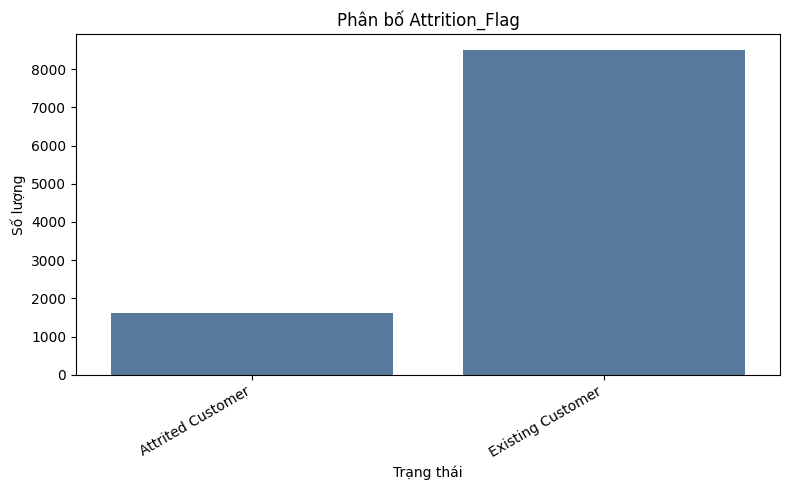

Attrited Customer: 1627 (16.07%)
Existing Customer: 8500 (83.93%)


In [88]:
# Phân bố biến mục tiêu Attrition_Flag
attr_values, attr_counts = np.unique(data['Attrition_Flag'], return_counts=True)
bar_chart(attr_values, attr_counts, title_name='Phân bố Attrition_Flag', xlabel='Trạng thái', ylabel='Số lượng')
for v, c in zip(attr_values, attr_counts):
    print(f"{v}: {c} ({c/attr_counts.sum()*100:.2f}%)")


**Biểu đồ cột so sánh số lượng giữa Existing Customer và Attrited Customer**
* Nhận xét:
    * Có sự chênh lệch rất lớn về số lượng mẫu. 
    * Nhóm khách hàng hiện tại chiếm đa số (khoảng 84%), trong khi nhóm rời bỏ chỉ chiếm khoảng 16%.
* Kết luận: Dữ liệu bị mất cân bằng (Imbalanced Data).
Khi train model, không thể chỉ dựa vào Accuracy. Cần sử dụng kỹ thuật cân bằng dữ liệu (như SMOTE) hoặc điều chỉnh trọng số (class weights) để model không bị bias về nhóm đa số.


Gender:


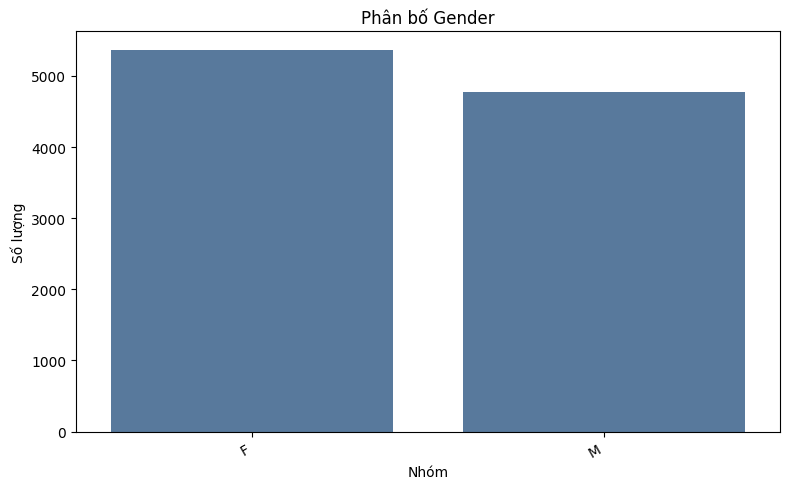


Education_Level:


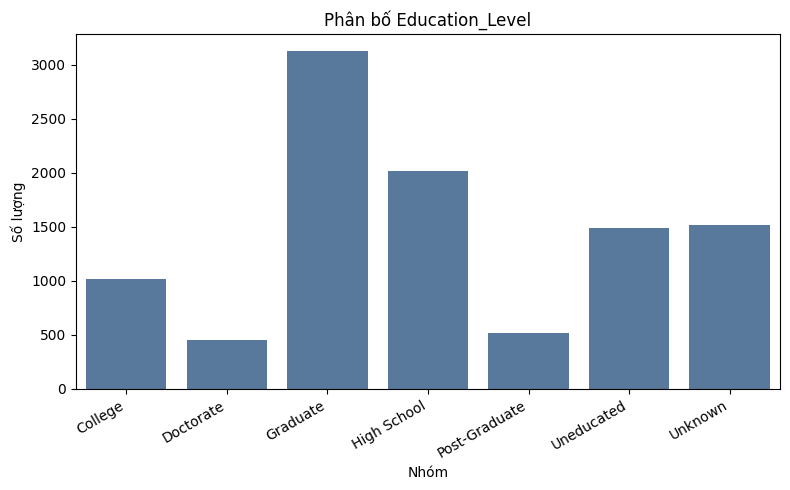


Marital_Status:


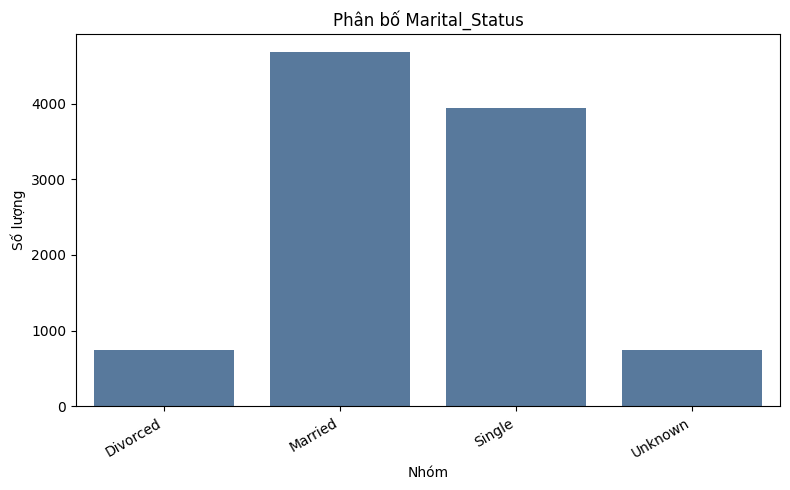


Income_Category:


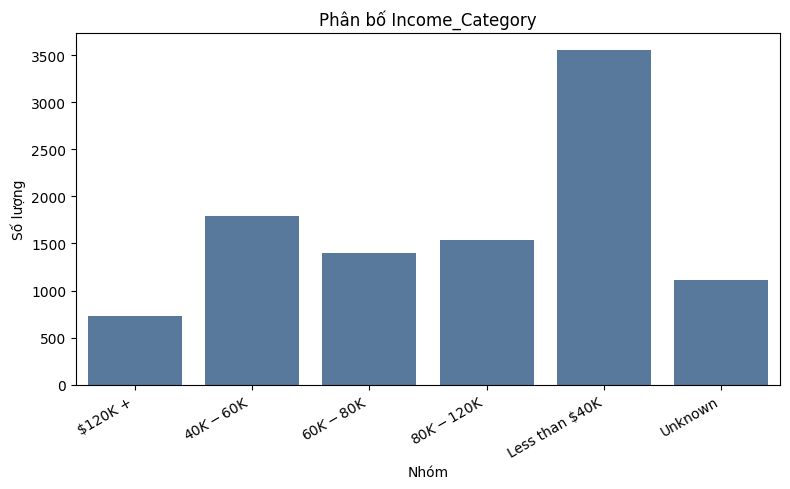


Card_Category:


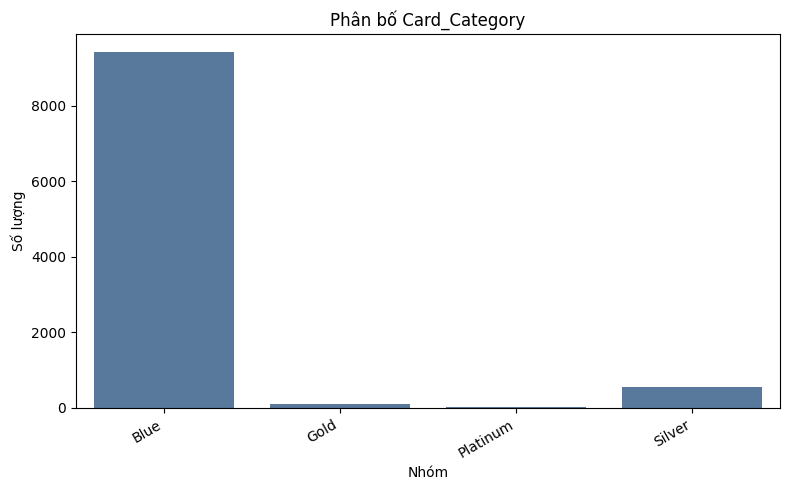

In [89]:
# Biến phân loại: biểu đồ cột
cat_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
for name in cat_features:
    if name not in column_names:
        continue
    print(f"\n{name}:")
    countplot_from_array(data[name], title_name=f'Phân bố {name}')


**Phân bố Marital_Status (Tình trạng hôn nhân)**
* Quan sát:
    * Nhóm khách hàng đã kết hôn (Married) chiếm số lượng lớn nhất (khoảng hơn 4.500 người).
    * Nhóm độc thân (Single) đứng thứ hai với số lượng khá cao (gần 4.000 người).
    * Nhóm đã ly hôn (Divorced) và nhóm không xác định (Unknown) chiếm tỷ lệ rất nhỏ và tương đương nhau (dưới 1.000 người).
* Nhận định: Dữ liệu tập trung chủ yếu vào hai nhóm đối tượng chính là Married và Single. Có thể gộp nhóm Divorced và Unknown nếu số lượng mẫu quá ít để tránh nhiễu.

**Phân bố Gender (Giới tính)**
* Quan sát:
    * Số lượng khách hàng Nữ (F) cao hơn so với Nam (M).
    * Cụ thể: Nữ đạt khoảng trên 5.000, trong khi Nam đạt khoảng dưới 5.000 một chút.
* Nhận định: Tỷ lệ giới tính trong tập dữ liệu này khá cân bằng (không bị chênh lệch quá lớn như các biến khác). Điều này tốt cho việc mô hình học các đặc trưng liên quan đến hành vi tiêu dùng giữa nam và nữ mà không sợ bị bias quá mức do mất cân bằng dữ liệu.


**Phân bố Card_Category (Loại thẻ)**
* Quan sát:
    * Loại thẻ Blue chiếm tỷ trọng áp đảo tuyệt đối (trên 9.000 khách hàng).
    * Các loại thẻ cao cấp hơn như Silver, Gold, và Platinum có số lượng cực kỳ thấp. Đặc biệt là Platinum gần như không đáng kể trên biểu đồ.
* Nhận định: Đây là biến có sự mất cân bằng dữ liệu nghiêm trọng (imbalanced class). Đại đa số khách hàng đều sử dụng loại thẻ cơ bản nhất. Nếu biến này được dùng làm biến mục tiêu (target variable), bạn sẽ cần kỹ thuật xử lý mất cân bằng (như SMOTE hoặc class weights). Nếu là biến độc lập (feature), nó có thể ít mang lại giá trị phân loại trừ khi nhóm khách hàng cao cấp (Gold/Platinum) có hành vi cực kỳ khác biệt.

**Phân bố Education_Level (Trình độ học vấn)**
* Quan sát:
    * Nhóm Cử nhân (Graduate) chiếm số lượng cao nhất (hơn 3.000).
    * Tiếp theo là nhóm Trung học (High School) (khoảng 2.000).
    * Nhóm Unknown (Không xác định) và Uneducated (Chưa qua đào tạo) có số lượng tương đương nhau (khoảng 1.500).
    * Thấp nhất là nhóm Tiến sĩ (Doctorate) và Sau đại học (Post-Graduate).
* Nhận định: Phổ trình độ học vấn của khách hàng khá rộng, nhưng tập trung nhiều nhất ở tầng lớp trí thức (Graduate) và phổ thông (High School). Tỷ lệ dữ liệu "Unknown" ở đây khá đáng kể, cần lưu ý khi xử lý dữ liệu (có thể coi Unknown là một category riêng biệt).

**Phân bố Income_Category (Mức thu nhập)**
* Quan sát:
    * Nhóm thu nhập Thấp hơn $40K (Less than $40K) chiếm tỷ trọng lớn nhất (hơn 3.500 người).
    * Nhóm thu nhập Cao nhất ($120K +) chiếm tỷ trọng nhỏ nhất.
    * Các mức thu nhập trung bình ($40K-$60K, $60K-$80K, $80K-$120K) phân bố khá đều nhau (dao động từ 1.400 đến 1.800).
    * Có một lượng đáng kể dữ liệu là Unknown (khoảng hơn 1.000).
* Nhận định: Phân bố thu nhập bị lệch phải (right-skewed), nghĩa là đa số khách hàng nằm ở mức thu nhập thấp và số lượng giảm dần khi thu nhập tăng lên. Điều này phản ánh đúng thực tế xã hội. Nhóm "Unknown" cũng cần được xử lý cẩn thận trong quá trình làm sạch dữ liệu.


Customer_Age:


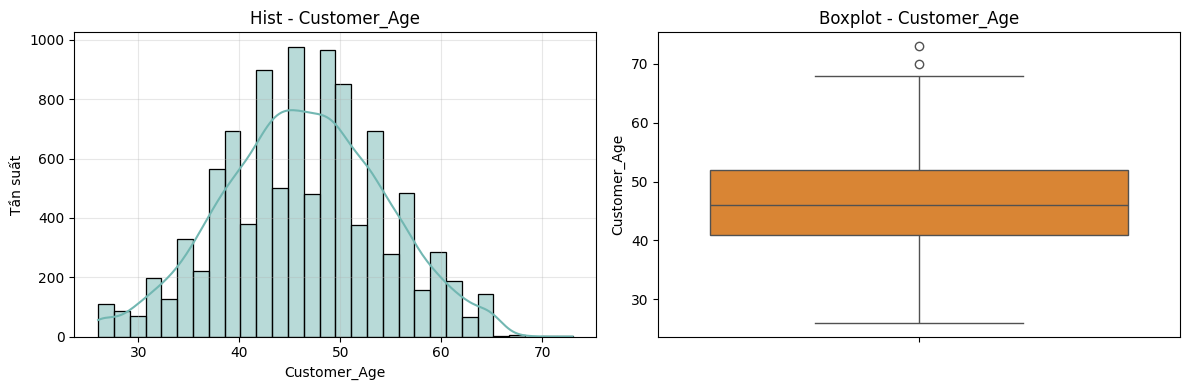


Credit_Limit:


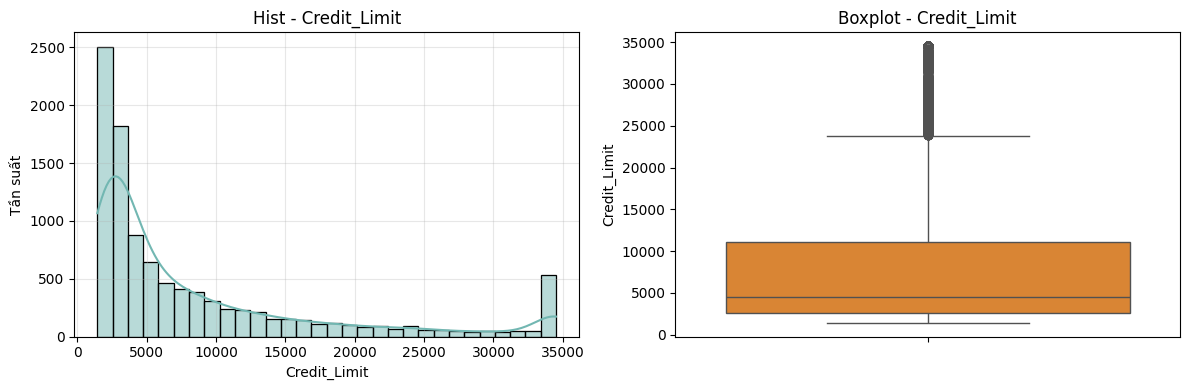


Total_Trans_Amt:


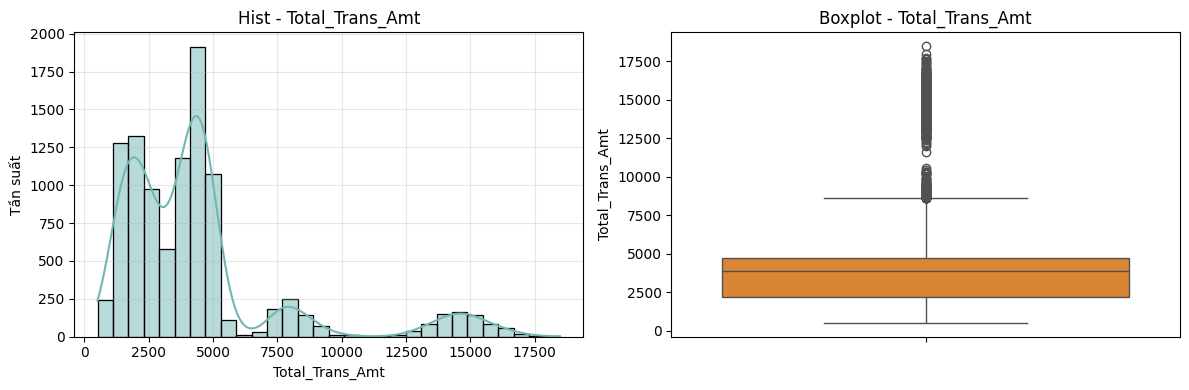


Total_Trans_Ct:


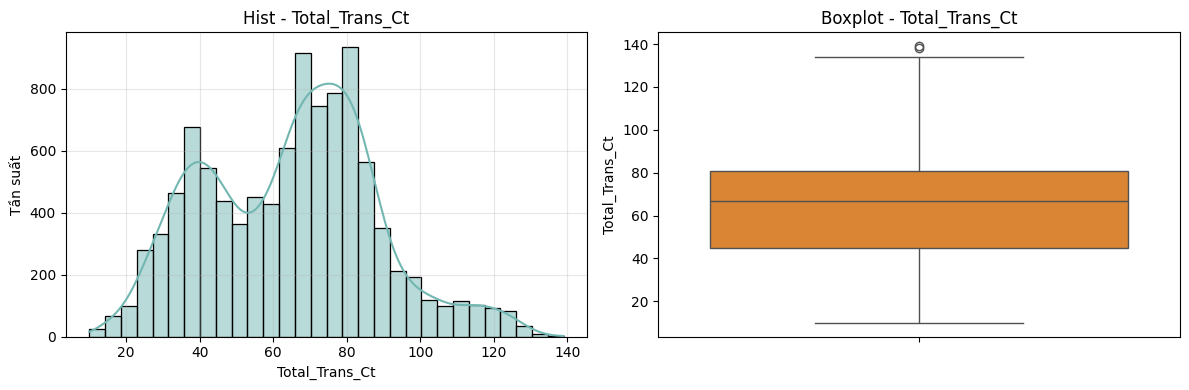

In [90]:
# Biến định lượng: histogram + boxplot
num_features_focus = ['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Total_Trans_Ct']
for name in num_features_focus:
    if name not in column_names:
        continue
    print(f"\n{name}:")
    hist_and_box(data[name].astype(float), bins=30, title=name, xlabel=name)


**Phân bố Credit_Limit (Hạn mức tín dụng)**
* Biểu đồ Histogram:
    * Phân phối lệch phải (Right-skewed/Positively skewed) rất mạnh.
    * Đa số khách hàng có hạn mức tín dụng thấp (tập trung ở mức dưới 5.000).
    * Có một đỉnh nhỏ bất thường ở mức cực đại (khoảng 33.000 - 34.500), cho thấy có một nhóm khách hàng VIP được cấp hạn mức.
* Biểu đồ Boxplot:
    * Median nằm ở mức thấp.
    * Xuất hiện rất nhiều outliers ở phía trên. Trong ngân hàng, đây thường là các khách hàng cao cấp chứ không phải dữ liệu lỗi.
* Nhận định: Khi mô hình hóa, biến này cần được xử lý kỹ (Log transformation) để giảm độ lệch, hoặc sử dụng các mô hình cây (Tree-based) để xử lý tốt hơn việc phân phối không chuẩn.

**Phân bố Total_Trans_Amt (Tổng số tiền giao dịch)**
* Biểu đồ Histogram:
    * Phân phối dạng Multimodal, cụ thể là có khoảng 3-4 đỉnh rõ rệt.
        * Đỉnh 1: Nhóm chi tiêu thấp (~1.500 - 2.500).
        * Đỉnh 2: Nhóm chi tiêu trung bình (~4.000 - 5.000).
        * Đỉnh 3: Nhóm chi tiêu cao (~14.000 - 15.000).
* Biểu đồ Boxplot:
    * Có nhiều Outliers ở mức giá trị cao (trên 10.000). 
    * Những outliers này tương ứng với đỉnh thứ 3 ở biểu đồ Hist.
* Nhận định: Dạng phân phối này gợi ý rằng khách hàng phân hóa thành các phân khúc (segments) rất rõ rệt dựa trên hành vi chi tiêu. Đây là biến quan trọng để phân loại khách hàng.


**Phân bố Customer_Age (Tuổi khách hàng)**
* Biểu đồ Histogram:
    * Phân phối có dạng hình chuông, rất gần với Phân phối chuẩn (Normal Distribution).
    * Độ tuổi tập trung nhiều nhất ở khoảng 40 - 50 tuổi. Mean xấp xỉ khoảng 46 tuổi.
* Biểu đồ Boxplot:
    * Box khá cân đối, whiskers đều hai bên.
    * Chỉ xuất hiện một vài outliers không đáng kể ở nhóm trên 70 tuổi.
* Nhận định: Đây là biến có phân phối đẹp trong tập dữ liệu, rất thuận lợi cho các model yêu cầu giả định về phân phối chuẩn (Linear Regression, Naive Bayes).


**Phân bố Total_Trans_Ct (Tổng số lượng giao dịch)**
* Biểu đồ Histogram:
    * Phân phối dạng hai đỉnh (Bimodal) rõ rệt.
        * Đỉnh 1: Khoảng 40 giao dịch/năm.
        * Đỉnh 2: Khoảng 70-80 giao dịch/năm.
    * Điều này cho thấy có hai nhóm hành vi: Nhóm ít sử dụng thẻ và nhóm sử dụng thẻ thường xuyên.
* Biểu đồ Boxplot:
    * Phân phối khá trải rộng nhưng không có hoặc có rất ít outliers.
* Nhận định: Biến này có sự tương đồng về hình dáng với Total_Trans_Amt (cũng có nhiều đỉnh). Khả năng cao là hai biến này có sự tương quan mạnh (Positive Correlation) với nhau.

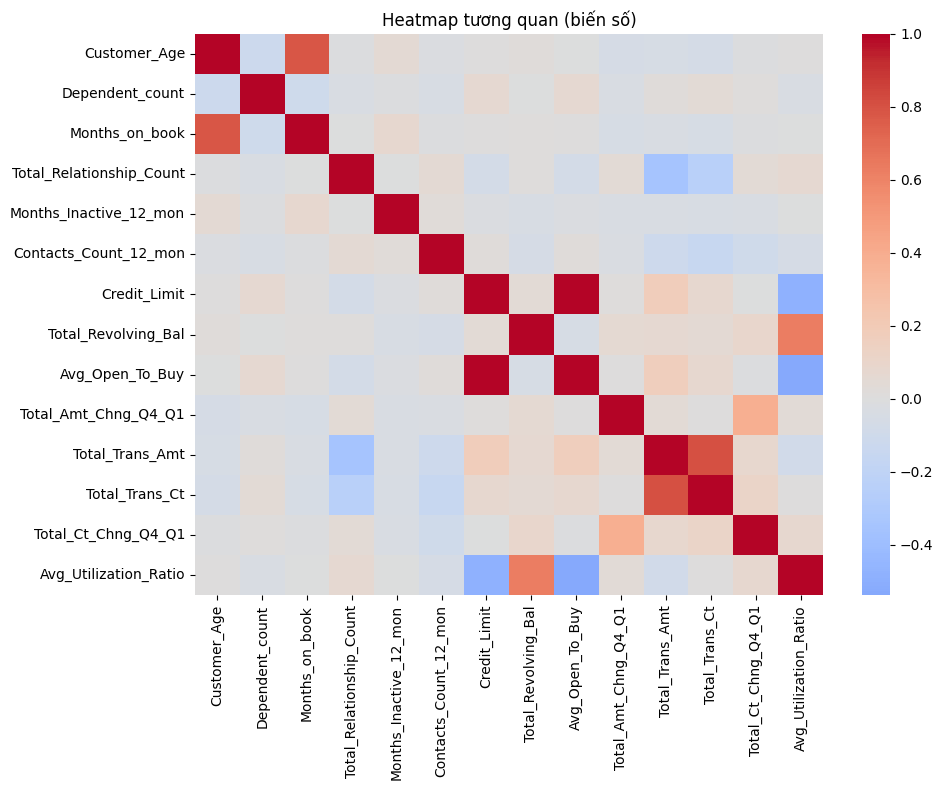

In [91]:
# Ma trận tương quan các biến số
num_matrix = np.vstack([data[name].astype(float) for name in numeric_cols]).T
corr_mat = np.corrcoef(num_matrix, rowvar=False)
heatmap_corr(corr_mat, numeric_cols, title='Heatmap tương quan (biến số)')


**Nhận xét**
* Credit_Limit và Avg_Open_To_Buy: có hiện tượng multicollinearity
    * Quan sát: Ô giao nhau có màu đỏ đậm nhất (hệ số tương quan $r \approx 1$).
    * Lý giải: Về mặt toán học, Avg_Open_To_Buy = Credit_Limit - Total_Revolving_Bal. Do đó, hai biến này mang thông tin gần như giống hệt nhau.
    * Phương pháp: Bắt buộc phải loại bỏ một trong hai biến này trước khi đưa vào mô hình để tránh hiện tượng đa cộng tuyến, gây nhiễu và làm sai lệch trọng số của mô hình, giữ lại Credit_Limit vì nó là đặc trưng gốc.

**Các cặp biến có tương quan thuận mạnh (Strong Positive Correlation)**
* Total_Trans_Amt (Tổng tiền) và Total_Trans_Ct (Tổng số lần giao dịch)
    * Quan sát: Màu đỏ đậm, hệ số tương quan cao (ước tính khoảng 0.8 trở lên).
    * Lý giải: Khách hàng quẹt thẻ nhiều lần thường sẽ có tổng số tiền chi tiêu lớn hơn. Điều này khớp với nhận định ở biểu đồ Histogram trước đó (cả hai đều có phân phối đa đỉnh).
    * Có nên giữ cả hai không. Tuy nhiên, trong bài toán phát hiện gian lận hoặc rời bỏ (churn), việc một người giao dịch nhiều lần nhưng số tiền nhỏ (hoặc ngược lại) có thể là một tín hiệu quan trọng, nên thường có thể giữ cả hai. 
* Customer_Age (Tuổi) và Months_on_book (Thời gian là khách hàng):
    * Quan sát: Màu đỏ trung bình.
    * Lý giải: Người lớn tuổi hơn thường có xu hướng đã mở tài khoản ngân hàng từ lâu hơn.
* Total_Revolving_Bal (Dư nợ xoay vòng) và Avg_Utilization_Ratio (Tỷ lệ sử dụng hạn mức)
    * Quan sát: có tương quan thuận rõ rệt.
    * Lý giải: Công thức tính Utilization Ratio = Revolving Balance / Credit Limit. Do đó, khi dư nợ tăng thì tỷ lệ sử dụng cũng tăng (nếu hạn mức không đổi).

**Các cặp biến có tương quan nghịch (Negative Correlation)**
* Credit_Limit và Avg_Utilization_Ratio:
    * Quan sát: Màu xanh nhạt chứng tỏ có tương quan âm.
    * Lý giải: Khi hạn mức tín dụng (Credit_Limit) tăng lên, nếu thói quen chi tiêu (số dư nợ) không đổi, thì tỷ lệ sử dụng hạn mức (Utilization Ratio) sẽ giảm xuống.

## Câu hỏi ý nghĩa (Meaningful question)


#### **1. Hành vi giao dịch khác nhau như thế nào giữa khách hàng rời bỏ và không rời bỏ?**
Các biến như:
* Total_Trans_Amt
* Total_Trans_Ct
* Avg_Utilization_Ratio

có sự khác biệt đáng kể giữa hai nhóm Attrited Customer và Existing Customer hay không?

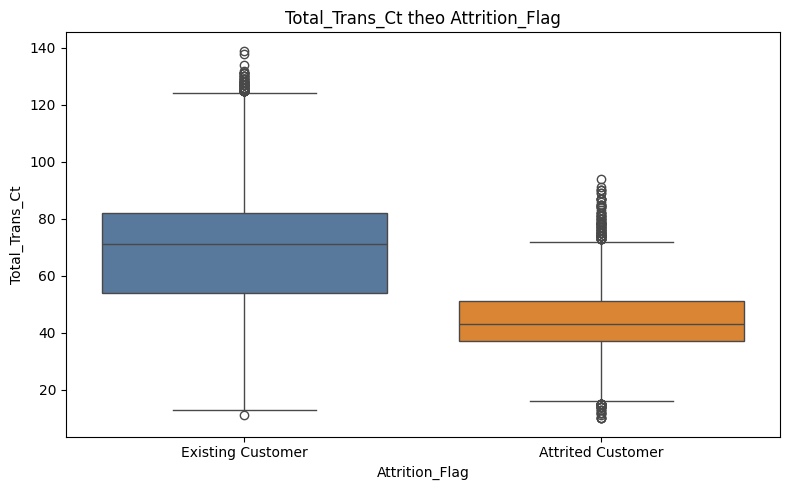

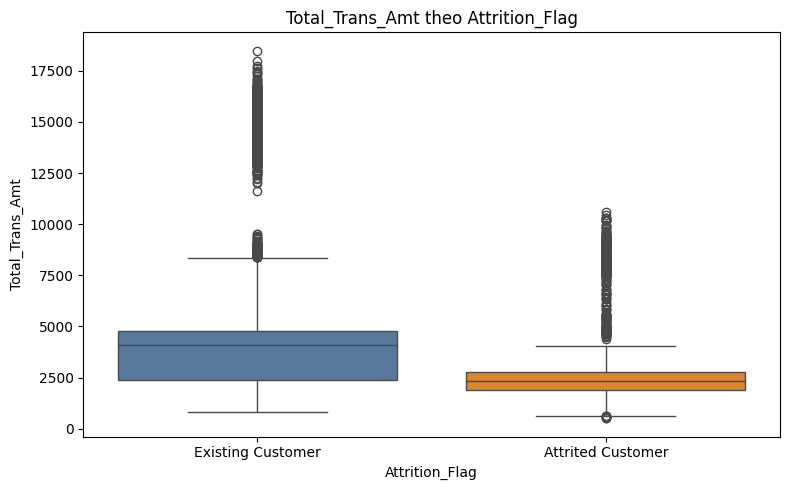

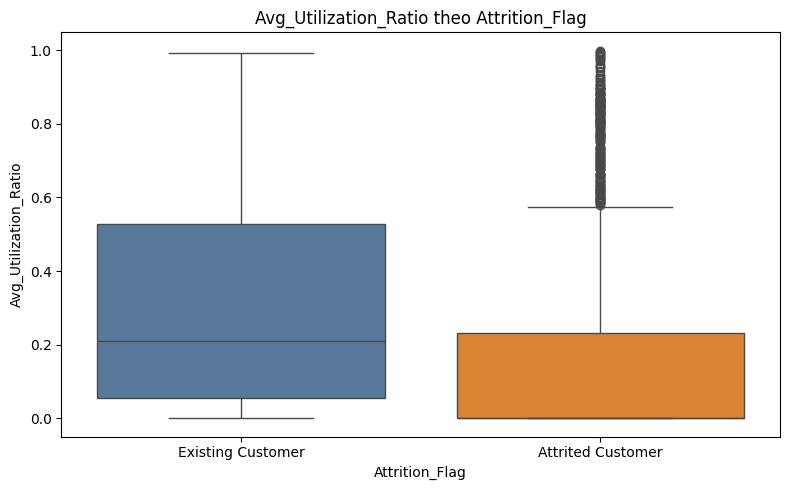

In [92]:
# Q1: Hành vi giao dịch giữa khách rời bỏ vs không rời bỏ
attr = data['Attrition_Flag']
features_compare = ['Total_Trans_Ct', 'Total_Trans_Amt', 'Avg_Utilization_Ratio']
for feat in features_compare:
    plt.figure(figsize=(8, 5))
    sns.boxplot(
        x=attr,
        y=data[feat].astype(float),
        hue=attr,
        palette={'Existing Customer': '#4C78A8', 'Attrited Customer': '#F58518'},
        legend=False,
    )
    plt.title(f'{feat} theo Attrition_Flag')
    plt.xlabel('Attrition_Flag')
    plt.ylabel(feat)
    plt.tight_layout()
    plt.show()


**Trả lời**

Số lượng giao dịch (Total_Trans_Ct) có khác biệt lớn nhất
* Existing Customer (Khách hàng hiện tại): Hoạt động nhiều hơn, trung bình thực hiện khoảng 69 giao dịch/năm.
* Attrited Customer (Khách hàng rời bỏ): Hoạt động ít hơn hẳn, trung bình chỉ khoảng 45 giao dịch/năm.
* Nhận định: Khách hàng rời bỏ thường có xu hướng giảm tần suất sử dụng thẻ đáng kể trước khi chính thức hủy dịch vụ. Nếu thấy một khách hàng có số lần giao dịch tụt xuống dưới mức 50 lần/năm, đây là dấu hiệu báo động đỏ.

Tổng số tiền giao dịch (Total_Trans_Amt)
* Existing Customer: Tổng chi tiêu trung bình khoảng $4,654.
* Attrited Customer: Tổng chi tiêu trung bình thấp hơn nhiều, chỉ khoảng $3,095.
* Nhận định: Khách hàng rời bỏ không chỉ quẹt thẻ ít lần hơn mà giá trị giao dịch cũng thấp hơn. Nhóm khách hàng trung thành là nhóm mang lại doanh thu lớn hơn hẳn cho ngân hàng.

Tỷ lệ sử dụng hạn mức (Avg_Utilization_Ratio)
* Existing Customer: Tỷ lệ sử dụng trung bình đạt ~29.6%.
* Attrited Customer: Tỷ lệ sử dụng rất thấp, chỉ khoảng 16.2%.
* Nhận định: Khách hàng sắp rời bỏ thường có xu hướng thanh toán hết dư nợ và ngừng chi tiêu thêm (đưa tỷ lệ sử dụng về mức thấp) trước khi đóng thẻ. Một thẻ tín dụng có hạn mức cao nhưng tỷ lệ sử dụng gần bằng 0% là một tín hiệu rủi ro rời bỏ cao.

#### **2. Mối quan hệ giữa mức độ sử dụng thẻ và khả năng churn là gì?**
Khách hàng có hạn mức tín dụng cao nhưng tỷ lệ sử dụng thấp có xu hướng rời bỏ nhiều hơn không?

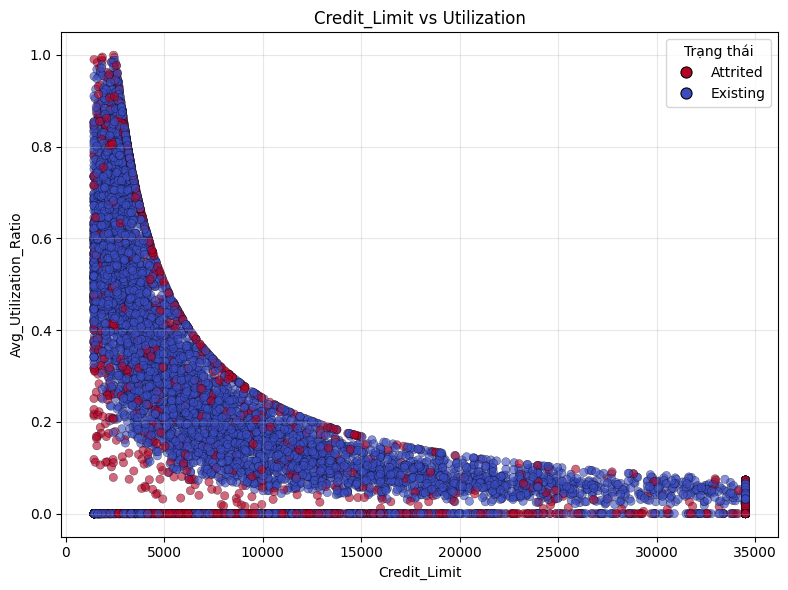

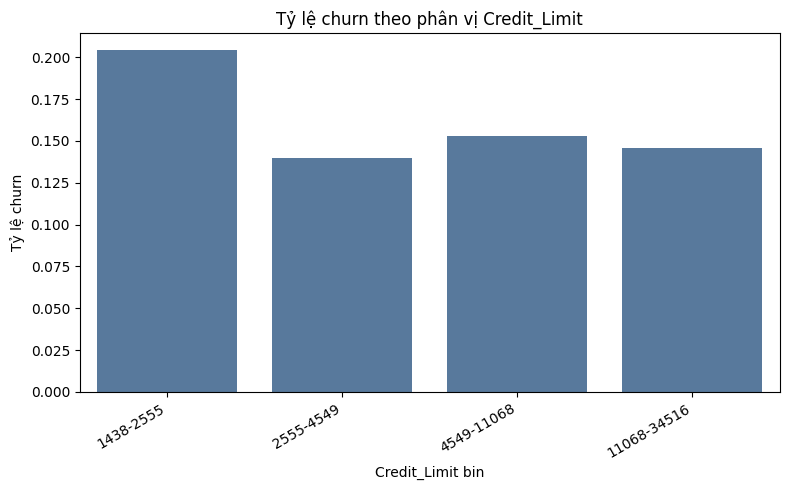

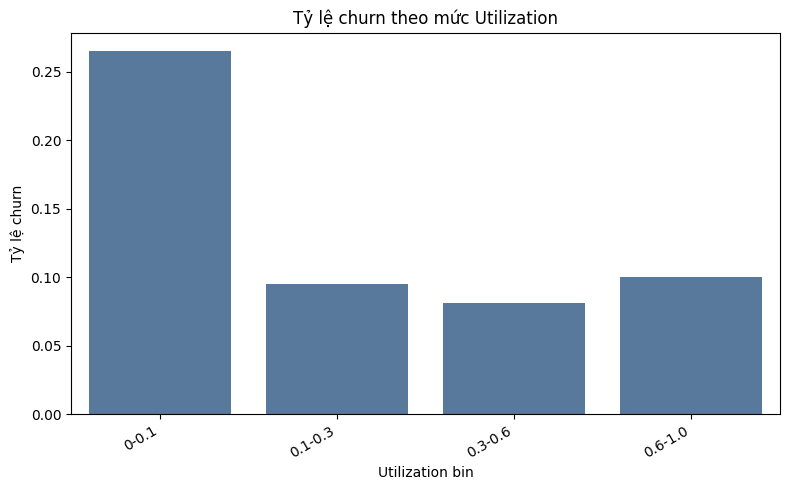

In [93]:
# Q2: Mối quan hệ hạn mức vs tỷ lệ sử dụng và churn
limit_vals = data['Credit_Limit'].astype(float)
util_vals = data['Avg_Utilization_Ratio'].astype(float)
attr_bin = np.array([1 if x == 'Attrited Customer' else 0 for x in data['Attrition_Flag']])

plt.figure(figsize=(8, 6))
plt.scatter(limit_vals, util_vals, c=attr_bin, cmap='coolwarm', alpha=0.6, edgecolor='k', linewidth=0.3)
plt.xlabel('Credit_Limit')
plt.ylabel('Avg_Utilization_Ratio')
plt.title('Credit_Limit vs Utilization')
plt.grid(alpha=0.3)
# Chú thích màu: đỏ = Attrited, xanh = Existing
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Attrited', markerfacecolor=plt.cm.coolwarm(1.0), markeredgecolor='k', markersize=8, markeredgewidth=0.8),
    Line2D([0], [0], marker='o', color='w', label='Existing', markerfacecolor=plt.cm.coolwarm(0.0), markeredgecolor='k', markersize=8, markeredgewidth=0.8),
]
plt.legend(handles=legend_elements, title='Trạng thái', loc='upper right')
plt.tight_layout()
plt.show()

# Churn rate theo phân vị hạn mức (quartile) và mức sử dụng (bins)
limit_bins = np.quantile(limit_vals, [0, 0.25, 0.5, 0.75, 1.0])
util_bins = [0, 0.1, 0.3, 0.6, 1.0]

limit_labels = []
limit_rates = []
for i in range(len(limit_bins)-1):
    low, high = limit_bins[i], limit_bins[i+1]
    mask = (limit_vals >= low) & (limit_vals <= high if i == len(limit_bins)-2 else limit_vals < high)
    total = mask.sum()
    churn = np.count_nonzero(attr_bin[mask] == 1)
    limit_labels.append(f'{low:.0f}-{high:.0f}')
    limit_rates.append(churn/total if total>0 else 0)
bar_chart(limit_labels, limit_rates, title_name='Tỷ lệ churn theo phân vị Credit_Limit', xlabel='Credit_Limit bin', ylabel='Tỷ lệ churn')

util_labels = ['0-0.1','0.1-0.3','0.3-0.6','0.6-1.0']
util_rates = []
for i in range(len(util_bins)-1):
    low, high = util_bins[i], util_bins[i+1]
    mask = (util_vals >= low) & (util_vals < high) if i < len(util_bins)-2 else (util_vals >= low) & (util_vals <= high)
    total = mask.sum()
    churn = np.count_nonzero(attr_bin[mask] == 1)
    util_rates.append(churn/total if total>0 else 0)
bar_chart(util_labels, util_rates, title_name='Tỷ lệ churn theo mức Utilization', xlabel='Utilization bin', ylabel='Tỷ lệ churn')


**Trả lời**

Biểu đồ Scatter Plot (Hạn mức vs. Tỷ lệ sử dụng) cho thấy một vùng tập trung rất dày các điểm màu đỏ (Khách hàng rời bỏ) ở đáy biểu đồ, nơi trục Y (Utilization) gần bằng 0, trải dài trên mọi mức hạn mức tín dụng.

Mối quan hệ giữa mức độ sử dụng thẻ (Avg_Utilization_Ratio) và khả năng rời bỏ (Churn):
* Có một mối quan hệ nghịch biến rất mạnh, tỷ lệ sử dụng càng thấp, nguy cơ rời bỏ càng cao.
* Khách hàng trung thành (Existing Customer) thường duy trì tỷ lệ sử dụng thẻ ở mức trung bình khoảng 30%.
* Ngược lại, khách hàng rời bỏ (Attrited Customer) thường có tỷ lệ sử dụng rất thấp, trung bình chỉ khoảng 16%.

Khách hàng có hạn mức cao (Credit Limit) nhưng sử dụng thấp có xu hướng rời bỏ không hẳn nhiều hơn, nhưng họ là nhóm có rủi ro ngầm sẽ rời bỏ.
* Tỷ lệ rời bỏ của nhóm này là ~16.3%.
* Tỷ lệ rời bỏ trung bình của toàn bộ tập dữ liệu là ~16.1%.

#### **3. Nhân khẩu học nào liên quan nhiều nhất đến churn?**
So sánh churn theo:
* Gender
* Age
* Marital_Status
* Income_Category
* Education_Level

Gender=F: churn 930/5358 = 17.36%
Gender=M: churn 697/4769 = 14.62%


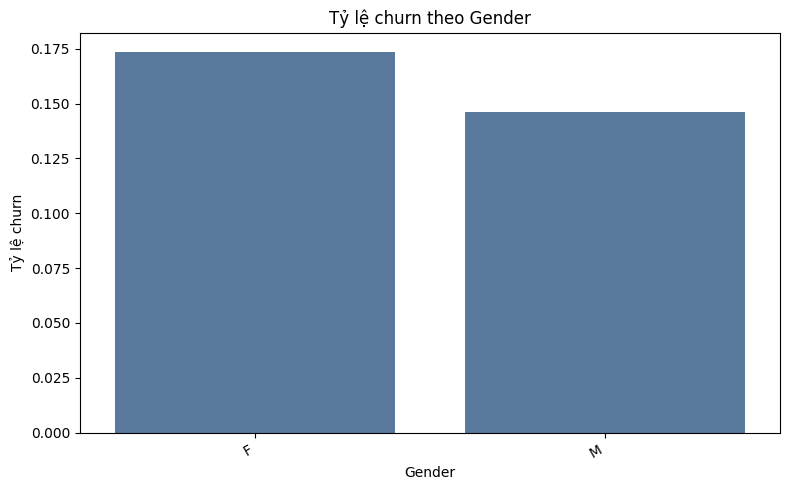

Marital_Status=Divorced: churn 121/748 = 16.18%
Marital_Status=Married: churn 709/4687 = 15.13%
Marital_Status=Single: churn 668/3943 = 16.94%
Marital_Status=Unknown: churn 129/749 = 17.22%


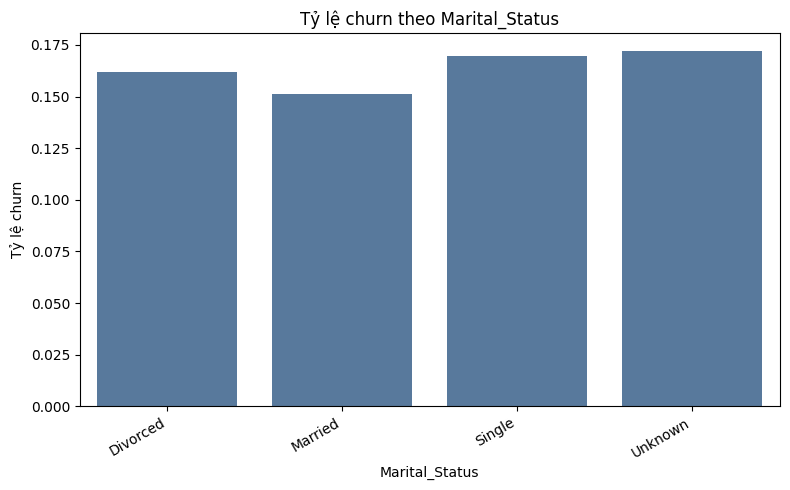

Income_Category=$120K +: churn 126/727 = 17.33%
Income_Category=$40K - $60K: churn 271/1790 = 15.14%
Income_Category=$60K - $80K: churn 189/1402 = 13.48%
Income_Category=$80K - $120K: churn 242/1535 = 15.77%
Income_Category=Less than $40K: churn 612/3561 = 17.19%
Income_Category=Unknown: churn 187/1112 = 16.82%


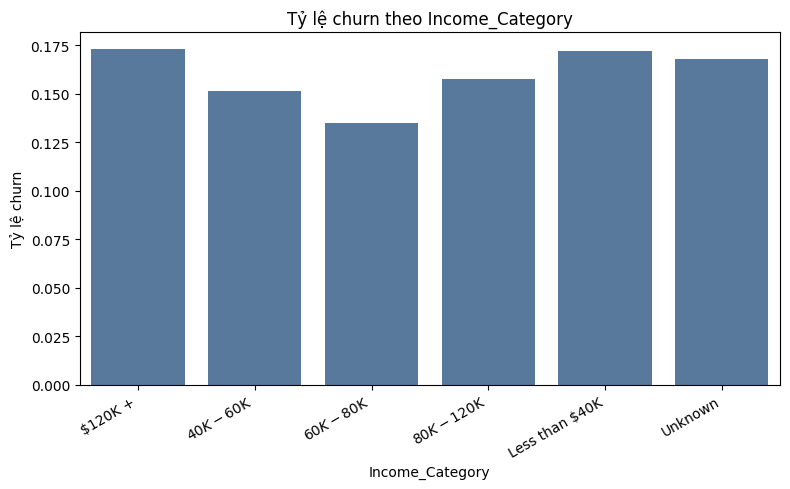

Education_Level=College: churn 154/1013 = 15.20%
Education_Level=Doctorate: churn 95/451 = 21.06%
Education_Level=Graduate: churn 487/3128 = 15.57%
Education_Level=High School: churn 306/2013 = 15.20%
Education_Level=Post-Graduate: churn 92/516 = 17.83%
Education_Level=Uneducated: churn 237/1487 = 15.94%
Education_Level=Unknown: churn 256/1519 = 16.85%


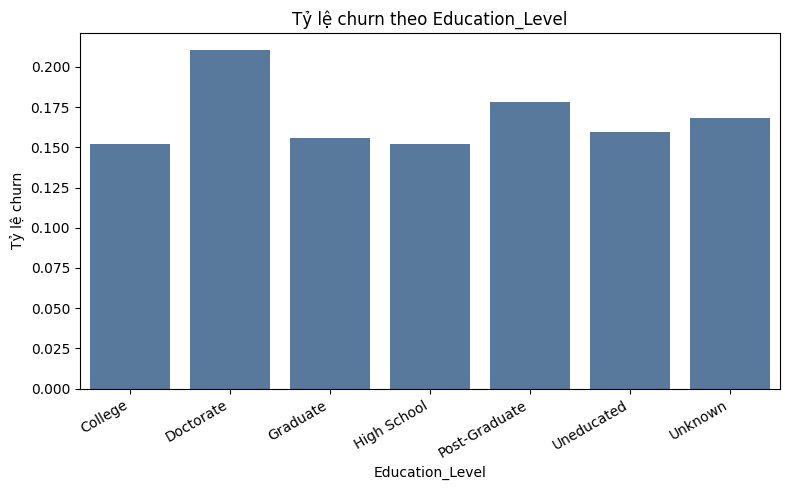

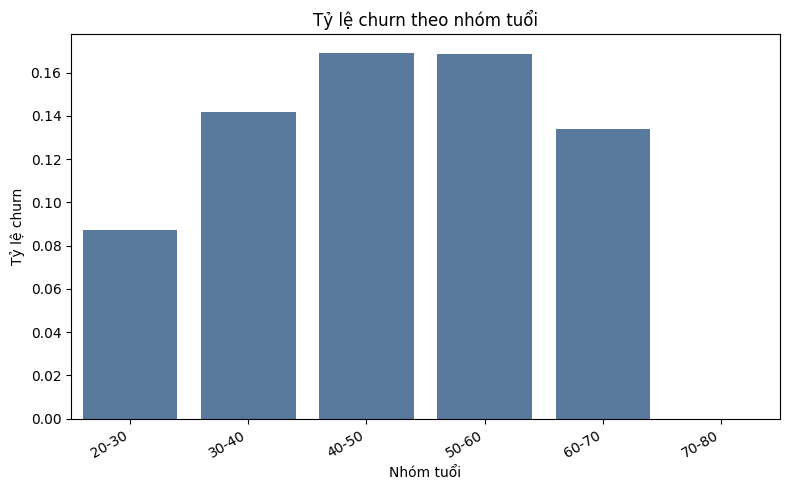

In [94]:
# Q3: Nhân khẩu học và churn
attr_bin = np.array([1 if x == 'Attrited Customer' else 0 for x in data['Attrition_Flag']])
cat_demo = ['Gender', 'Marital_Status', 'Income_Category', 'Education_Level']
for col in cat_demo:
    if col not in column_names:
        continue
    values, counts = np.unique(data[col], return_counts=True)
    rates = []
    for v, total in zip(values, counts):
        mask = data[col] == v
        churn = np.count_nonzero(attr_bin[mask] == 1)
        rates.append(churn/total if total>0 else 0)
        print(f"{col}={v}: churn {churn}/{total} = {rates[-1]*100:.2f}%")
    bar_chart(values, rates, title_name=f'Tỷ lệ churn theo {col}', xlabel=col, ylabel='Tỷ lệ churn')

# Churn theo nhóm tuổi (bins)
age_vals = data['Customer_Age'].astype(float)
age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = []
age_rates = []
for i in range(len(age_bins)-1):
    low, high = age_bins[i], age_bins[i+1]
    mask = (age_vals >= low) & (age_vals < high) if i < len(age_bins)-2 else (age_vals >= low) & (age_vals <= high)
    total = mask.sum()
    churn = np.count_nonzero(attr_bin[mask] == 1)
    age_labels.append(f'{low}-{high}')
    age_rates.append(churn/total if total>0 else 0)
bar_chart(age_labels, age_rates, title_name='Tỷ lệ churn theo nhóm tuổi', xlabel='Nhóm tuổi', ylabel='Tỷ lệ churn')


**Trả lời**

Phân tích chi tiết từng yếu tố:
1. Trình độ học vấn (Education_Level) - Điểm đáng chú ý nhất
* Nhóm rủi ro cao nhất: Khách hàng có trình độ Doctorate (Tiến sĩ) có tỷ lệ rời bỏ lên tới ~21%, cao hơn đáng kể so với mức trung bình chung (16%).
* Các nhóm còn lại: Từ Uneducated đến Graduate có tỷ lệ rời bỏ khá đồng đều, dao động quanh mức 15-16%.

Insight: Có thể nhóm khách hàng có trình độ học vấn rất cao (Doctorate) có yêu cầu khắt khe hơn về dịch vụ, hoặc họ có nhiều lựa chọn tài chính tốt hơn từ các ngân hàng đối thủ, nên dễ dàng rời đi nếu không hài lòng.

2. Giới tính (Gender)
* Nữ giới (F): Tỷ lệ rời bỏ là 17.3%.
* Nam giới (M): Tỷ lệ rời bỏ là 14.6%.

Insight: Nữ giới có xu hướng rời bỏ cao hơn. (Note: Có thể cân nhắc các chương trình ưu đãi hướng đến nhu cầu chi tiêu của nữ giới (mua sắm, gia đình, sức khỏe) để cải thiện tỷ lệ giữ chân này).

3. Mức thu nhập (Income_Category)
* Bất ngờ: Không có quy luật người nghèo rời bỏ nhiều hơn hay người giàu rời bỏ nhiều hơn một cách tuyến tính.
* Quan sát: Nhóm thu nhập $120K+ (cao nhất) và nhóm Less than $40K (thấp nhất) có tỷ lệ rời bỏ khá tương đồng (khoảng 17%).

Insight: Thu nhập không phải là yếu tố dự báo quá mạnh. Người giàu có thể rời bỏ vì dịch vụ không đủ tốt, người thu nhập thấp rời bỏ vì phí cao. Lý do khác nhau nhưng kết quả giống nhau.

4. Độ tuổi (Age) & Hôn nhân (Marital_Status)
* Tuổi tác: Tỷ lệ rời bỏ khá ổn định qua các nhóm tuổi, dao động nhẹ quanh mức 15-17%.
* Hôn nhân: Nhóm Single (Độc thân) có tỷ lệ rời bỏ cao hơn một chút so với nhóm Married (Đã kết hôn), nhưng sự chênh lệch là không đáng kể.

#### **4. Thời gian gắn bó với ngân hàng ảnh hưởng thế nào đến churn?**
Biến Months_on_book:
* Khách hàng mới hay khách hàng lâu năm dễ churn hơn?
* Có ngưỡng thời gian “nguy hiểm” không?

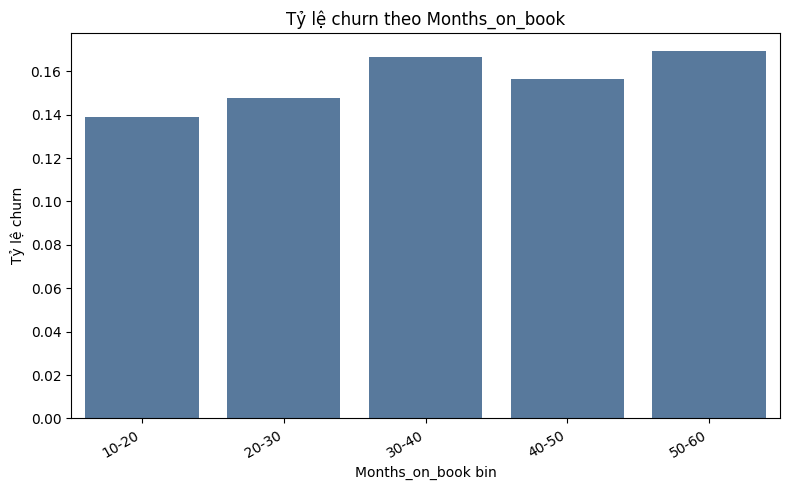

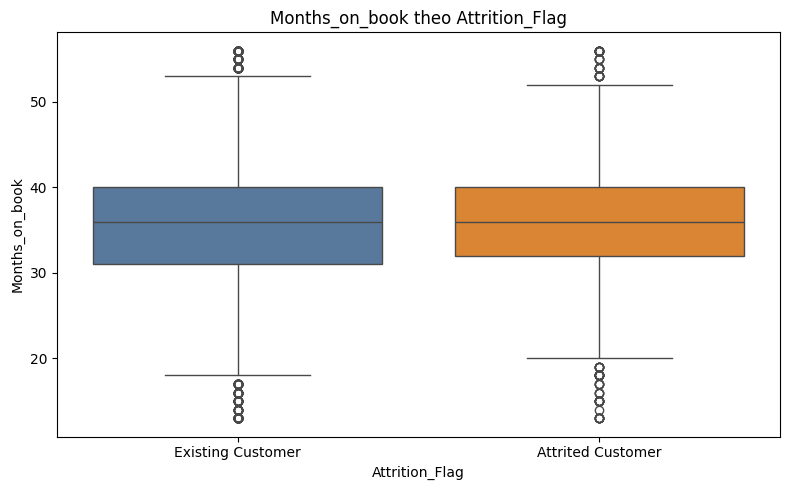

In [95]:
# Q4: Thời gian gắn bó (Months_on_book) và churn
mob_vals = data['Months_on_book'].astype(float)
mob_bins = [10, 20, 30, 40, 50, 60]
mob_labels = []
mob_rates = []
attr_bin = np.array([1 if x == 'Attrited Customer' else 0 for x in data['Attrition_Flag']])
for i in range(len(mob_bins)-1):
    low, high = mob_bins[i], mob_bins[i+1]
    mask = (mob_vals >= low) & (mob_vals < high) if i < len(mob_bins)-2 else (mob_vals >= low) & (mob_vals <= high)
    total = mask.sum()
    churn = np.count_nonzero(attr_bin[mask] == 1)
    mob_labels.append(f'{low}-{high}')
    mob_rates.append(churn/total if total>0 else 0)
bar_chart(mob_labels, mob_rates, title_name='Tỷ lệ churn theo Months_on_book', xlabel='Months_on_book bin', ylabel='Tỷ lệ churn')

plt.figure(figsize=(8,5))
sns.boxplot(
    x=data['Attrition_Flag'],
    y=mob_vals,
    hue=data['Attrition_Flag'],
    palette={'Existing Customer': '#4C78A8', 'Attrited Customer': '#F58518'},
    legend=False,
)
plt.title('Months_on_book theo Attrition_Flag')
plt.xlabel('Attrition_Flag')
plt.ylabel('Months_on_book')
plt.tight_layout()
plt.show()


**Trả lời**

Không có sự khác biệt khách hàng mới hay khách hàng lâu năm ảnh liên quan đến churn.
* Số liệu: Thời gian gắn bó trung bình của nhóm Khách hàng rời bỏ (Attrited Customer) là 36.18 tháng. Thời gian gắn bó trung bình của nhóm Khách hàng ở lại (Existing Customer) là 35.88 tháng.
* Biểu đồ Boxplot cho thấy hai median của hai nhóm nằm trùng khít lên nhau (đều ở mốc 36 tháng). Interquartile Range cũng gần như tương đương.
* Kết luận: không thể nhìn vào thâm niên của khách hàng để đoán họ có rời bỏ hay không. Một người dùng thẻ 5 năm có nguy cơ rời bỏ ngang bằng với một người mới dùng thẻ 1 năm nếu hành vi giao dịch của họ giống nhau.


Có ngưỡng thời gian "nguy hiểm": tại mốc 36 tháng (3 năm).
* Đỉnh phân bố (The Spike): Biểu đồ Histogram cho thấy một lượng khách hàng khổng lồ tập trung ở mốc 36 tháng. Đây có thể là do chu kỳ hợp đồng, thời hạn hết hạn thẻ, hoặc kết quả của một chiến dịch marketing lớn từ 3 năm trước.
* Tỷ lệ Churn tại mốc 36 tháng: Tỷ lệ rời bỏ tại đây là ~17.5%, cao hơn một chút so với mức trung bình của toàn tập dữ liệu (16%), nhưng không quá đột biến.
* CMặc dù tỷ lệ % không quá cao, nhưng vì số lượng khách hàng ở mốc 36 tháng rất đông, nên về mặt số lượng tuyệt đối, đây là thời điểm ngân hàng mất nhiều khách hàng nhất.